In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [57]:
sales_gdf = pd.read_csv('data/sales_gdf.csv')

In [13]:
final_df = pd.read_csv('data/Full Data long.csv')
final_df.info()
final_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218374 entries, 0 to 218373
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   GEO_ID                    218353 non-null  object 
 1   Year                      218374 non-null  int64  
 2   pin                       218374 non-null  int64  
 3   sale_price                218374 non-null  float64
 4   age                       218374 non-null  int64  
 5   addr                      218371 non-null  object 
 6   hd_sf                     218374 non-null  float64
 7   n_units                   218374 non-null  float64
 8   bldg_sf                   132602 non-null  float64
 9   geometry                  218374 non-null  object 
 10  pri_neigh                 218374 non-null  object 
 11  sec_neigh                 218374 non-null  object 
 12  side                      218374 non-null  object 
 13  actual_sf                 218374 non-null  f

,GEO_ID,Year,pin,sale_price,age,addr,hd_sf,n_units,bldg_sf,geometry,...,Percent White,Percent Black,Percent HH with Children,Percent Housing Vacant,Number of Public Schools,crime_count,crimes_per_capita,station_id,station_name,distance_miles
0,1500000US170318392002,2015,17273100931118,53000.0,44,2921 S MICHIGAN AVE,365398.0,679.0,NaN,POINT (-87.62257654590501 41.8402291575061),...,0.122995,0.699771,0.265432,0.111835,1.0,209.0,0.159664,30382.0,Cermak-McCormick Place,0.213983
1,1500000US170313514001,2018,17343220150000,410000.0,130,3819 S WABASH AVE,3850.0,1.0,5050.0,POINT (-87.62436774377279 41.8249549567756),...,0.034858,0.917211,0.433090,0.062945,1.0,296.0,0.161220,30214.0,35th-Bronzeville-IIT,0.183507
2,1500000US170318420001,2019,17341030641004,250000.0,11,223 E 31ST ST,2738.0,3.0,NaN,POINT (-87.62080085952471 41.8381539098695),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30214.0,35th-Bronzeville-IIT,0.303191


In [38]:
final_df[final_df['addr'] == '155 N HARBOR DR'][['pri_neigh', 'sale_price', 'addr', 'hd_sf', 'n_units']]

,pri_neigh,sale_price,addr,hd_sf,n_units
177685,Loop,427000.0,155 N HARBOR DR,78597.0,737.0
177806,Loop,320000.0,155 N HARBOR DR,78597.0,737.0
177807,Loop,325000.0,155 N HARBOR DR,78597.0,737.0
177808,Loop,345000.0,155 N HARBOR DR,78597.0,737.0
177810,Loop,309000.0,155 N HARBOR DR,78597.0,737.0
...,...,...,...,...,...
181323,Loop,435000.0,155 N HARBOR DR,78597.0,739.0
181326,Loop,155000.0,155 N HARBOR DR,78597.0,739.0
181334,Loop,400000.0,155 N HARBOR DR,78597.0,739.0
181335,Loop,405000.0,155 N HARBOR DR,78597.0,739.0


In [83]:
final_df['pricer_per_sqft'] = final_df['sale_price'] / final_df['hd_sf'] / final_df['n_units']
#final_df['pricer_per_unit'] = final_df['sale_price'] / final_df['n_units']
final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['pricer_per_sqft'].mean().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')
final_df_avgsale[final_df_avgsale['side'] == 'Central']

,pri_neigh,pricer_per_sqft,side
0,Streeterville,inf,Central
9,Near South Side,133.235036,Central
38,Gold Coast,53.676368,Central
56,Rush & Division,33.677851,Central
73,River North,24.339535,Central
91,Printers Row,0.452711,Central
92,Loop,0.100896,Central


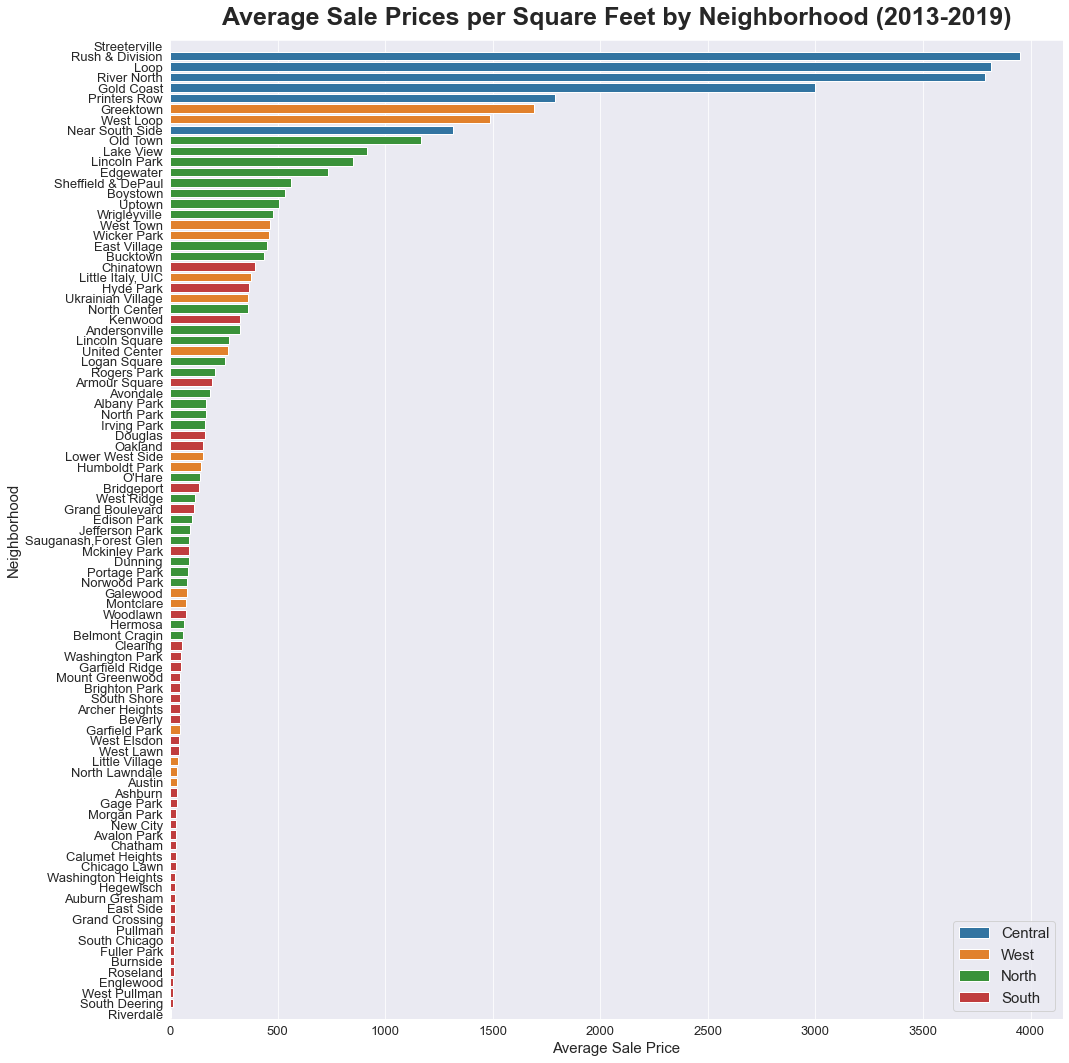

In [82]:
#final_df['pricer_per_unit'] = final_df['sale_price'] / final_df['n_units']
final_df['pricer_per_unit'] = final_df['sale_price'] / (final_df['hd_sf'] / final_df['n_units'])

final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['pricer_per_unit'].mean().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

fig, ax = plt.subplots(figsize=(16,18))

sns.barplot(final_df_avgsale.pricer_per_unit, final_df_avgsale.pri_neigh, hue=final_df_avgsale.side, dodge=False)
ax.set_title('Average Sale Prices per Square Feet by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Average Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

plt.savefig('figures/saleprice_per_sqft_by_nbh.png')
plt.show()

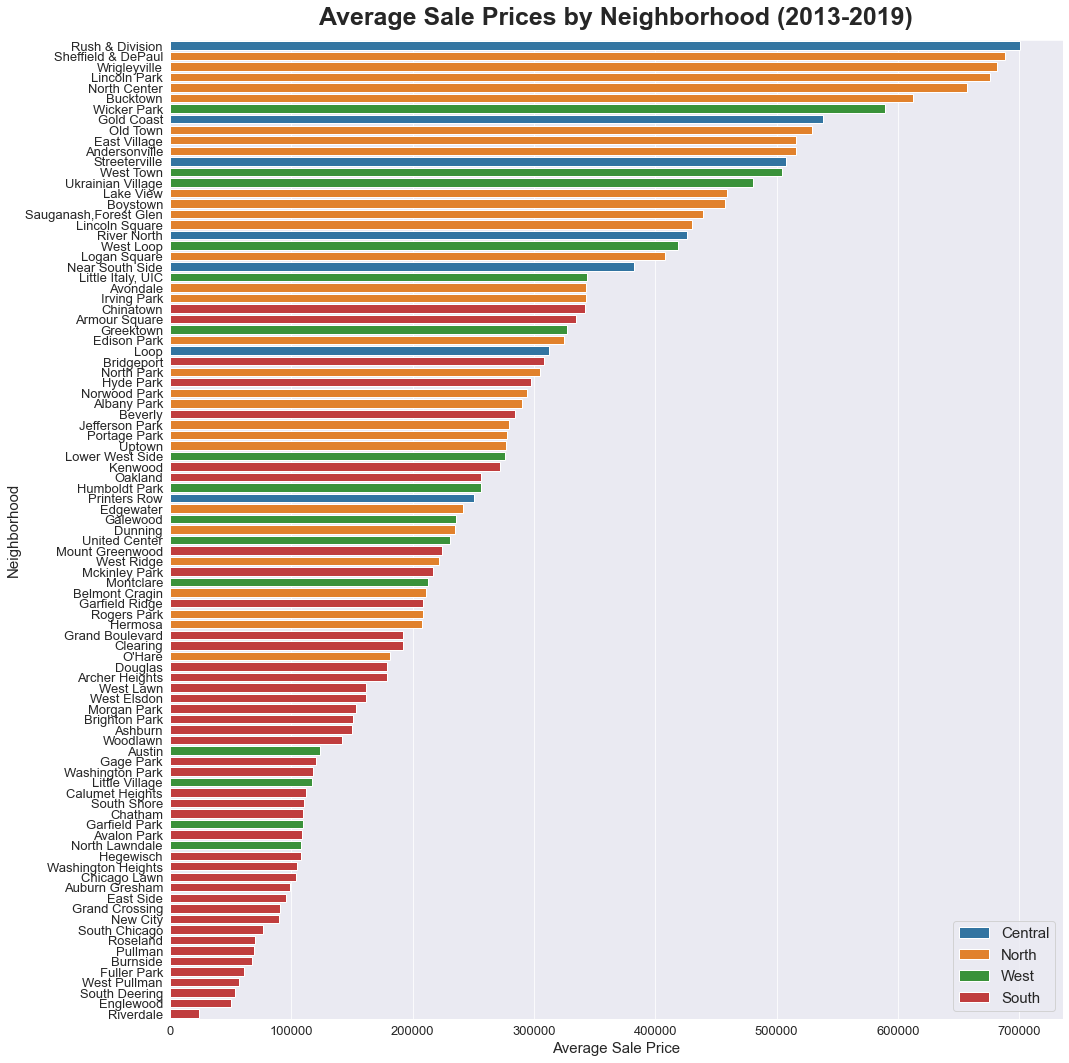

In [72]:
final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['sale_price'].mean().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

fig, ax = plt.subplots(figsize=(16,18))

sns.barplot(final_df_avgsale.sale_price, final_df_avgsale.pri_neigh, hue=final_df_avgsale.side, dodge=False)
ax.set_title('Average Sale Prices by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Average Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

plt.savefig('figures/saleprice_by_nbh.png')
plt.show()

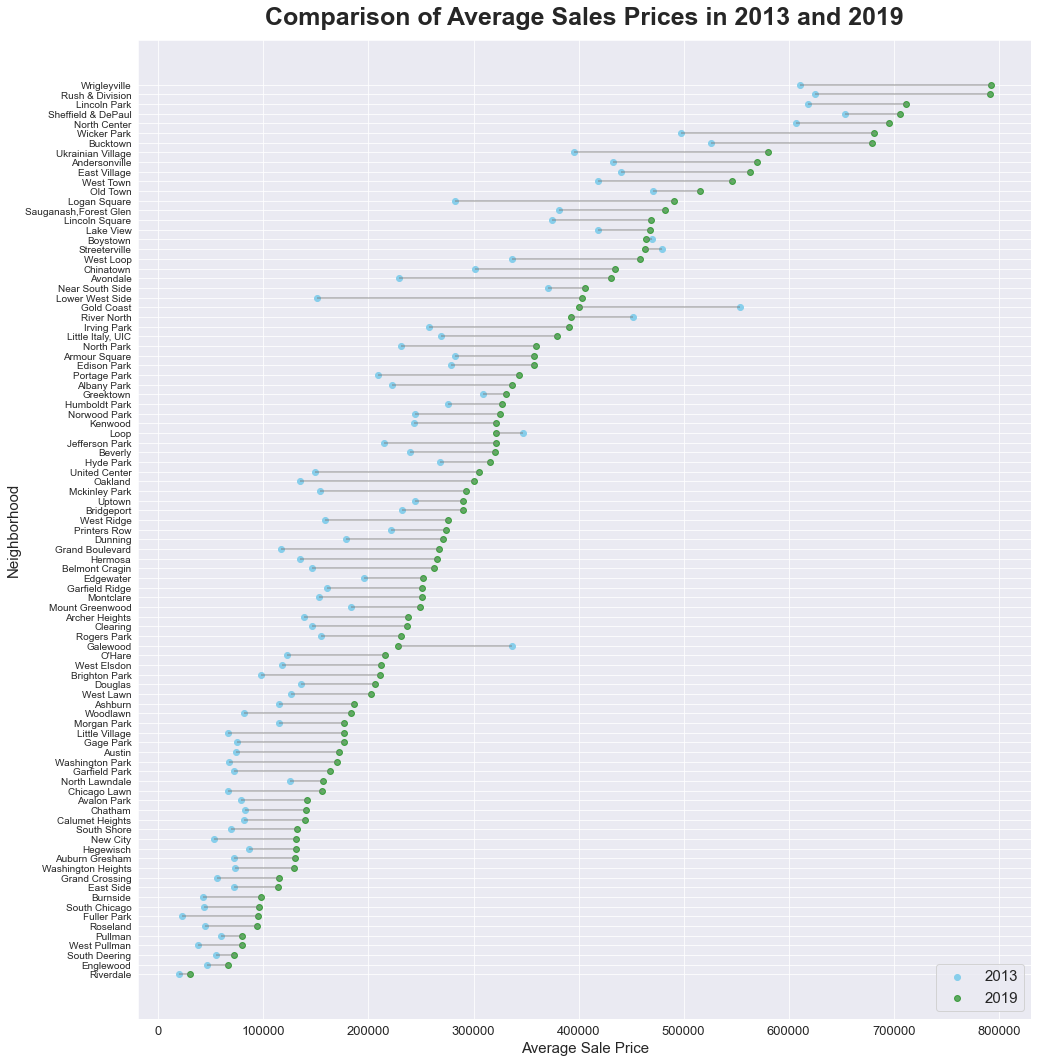

In [71]:
sales_compare = final_df[(final_df['Year'] == 2013) | (final_df['Year'] == 2019)]
sales_compare = sales_compare.groupby(['pri_neigh', 'Year'])['sale_price'].mean().unstack()
sales_compare = sales_compare.sort_values(by=2019, ascending=True)

my_range=range(1,len(sales_compare.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
fig, ax = plt.subplots(figsize=(16,18))

plt.hlines(y=my_range, xmin=sales_compare[2013], xmax=sales_compare[2019], color='grey', alpha=0.6)
plt.scatter(sales_compare[2013], my_range, color='skyblue', alpha=1, label='2013')
plt.scatter(sales_compare[2019], my_range, color='green', alpha=0.6 , label='2019')
plt.legend()
 
# Add title and axis names
ax.set_title('Comparison of Average Sales Prices in 2013 and 2019', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Average Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(my_range, sales_compare.index)
plt.legend(loc='lower right', fontsize=15)

plt.savefig('figures/avg_saleprice.png')
plt.show()

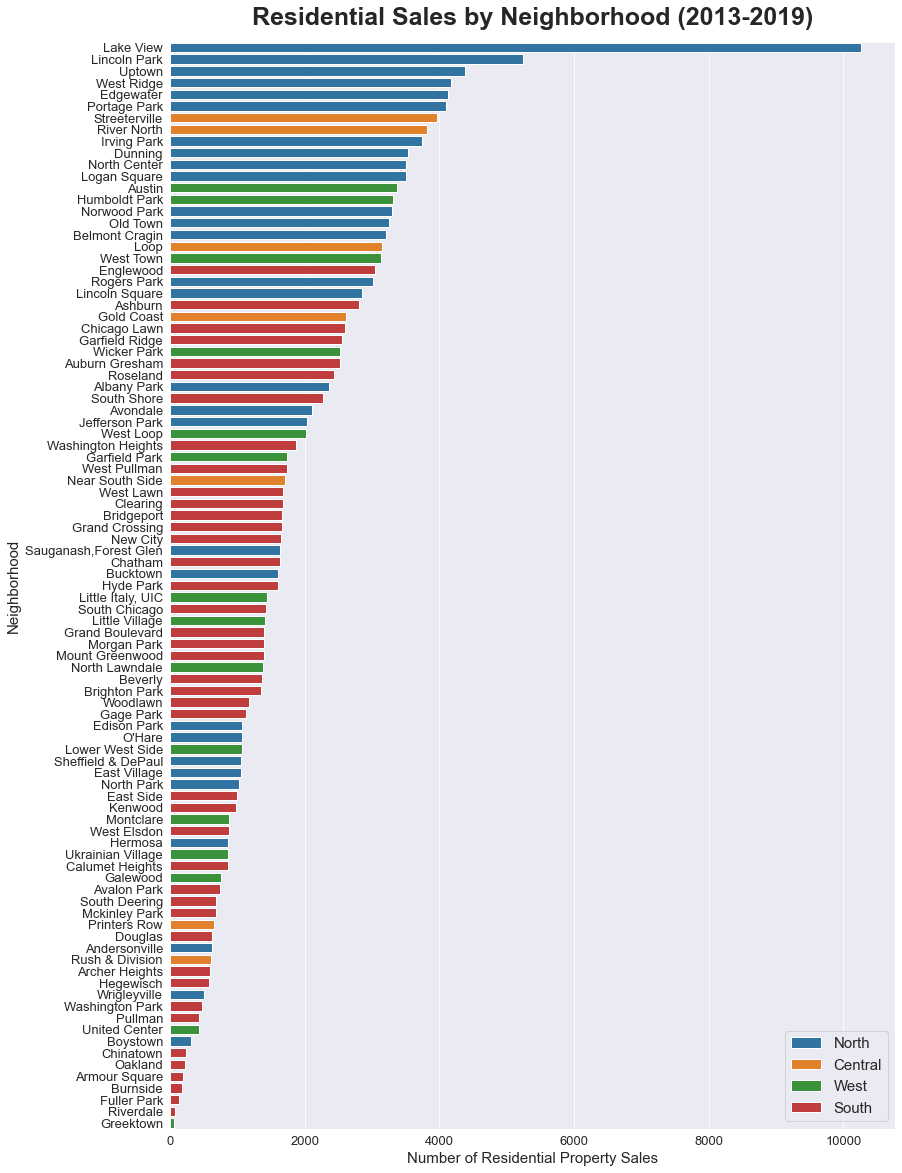

In [63]:
sales_gdf_count = pd.DataFrame(sales_gdf.groupby('pri_neigh')['pin'].nunique().sort_values(ascending=False)).reset_index()
sales_gdf_count = sales_gdf_count.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

fig, ax = plt.subplots(figsize=(13,20))

sns.barplot(sales_gdf_count.pin, sales_gdf_count.pri_neigh, hue=sales_gdf_count.side, dodge=False)
ax.set_title('Residential Sales by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Number of Residential Property Sales', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

plt.show()

In [150]:
# income_compare = sales_gdf[['pri_neigh', '2013 Median Income', '2018 Median Income']]
# income_compare = income_compare.groupby('pri_neigh')[['2013 Median Income', '2018 Median Income']].mean()
# income_compare = income_compare.sort_values(by='2018 Median Income', ascending=True)

# my_range=range(1,len(income_compare.index)+1)
 
# # The vertical plot is made using the hline function
# fig, ax = plt.subplots(figsize=(13,20))

# plt.hlines(y=my_range, xmin=income_compare['2013 Median Income'], xmax=income_compare['2018 Median Income'], color='grey', alpha=0.6)
# plt.scatter(income_compare['2013 Median Income'], my_range, color='skyblue', alpha=1, label='2013')
# plt.scatter(income_compare['2018 Median Income'], my_range, color='green', alpha=0.6 , label='2019')
# plt.legend()
 
# # Add title and axis names
# ax.set_title('Comparison of Median Income in 2013 and 2018', fontsize=25,
#              fontweight="bold", loc='center', y=1.01)
# ax.set_xlabel('Median Income', fontsize=15)
# ax.set_ylabel('Neighborhood', fontsize=15)
# plt.xticks(fontsize=13)
# plt.yticks(my_range, income_compare.index)
# plt.legend(loc='lower right', fontsize=15)

# plt.show()

In [ ]:
final_df_avgsale = pd.DataFrame(final_df.groupby('side')['sale_price'].mean().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

In [79]:
side_sale_by_year = pd.DataFrame(final_df.groupby(['side', 'Year'])['sale_price'].mean()).reset_index()
side_sale_by_year

,side,Year,sale_price
0,Central,2013,446485.040072
1,Central,2014,472498.117321
2,Central,2015,460956.402078
3,Central,2016,448716.964415
4,Central,2017,436565.787911
5,Central,2018,415090.679922
6,Central,2019,415171.727633
7,North,2013,322191.346381
8,North,2014,364665.512510
9,North,2015,388820.403614


In [80]:
427000.0 / (78597.0 / 737.0)

4003.956894029034

In [81]:
427000.0 / 78597.0 / 737.0

0.007371475349346215

In [73]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218374 entries, 0 to 218373
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   GEO_ID                    218353 non-null  object 
 1   Year                      218374 non-null  int64  
 2   pin                       218374 non-null  int64  
 3   sale_price                218374 non-null  float64
 4   est_land                  218374 non-null  int64  
 5   est_bldg                  218374 non-null  int64  
 6   age                       218374 non-null  int64  
 7   addr                      218371 non-null  object 
 8   bldg_sf                   132602 non-null  float64
 9   geometry                  218374 non-null  object 
 10  pri_neigh                 218374 non-null  object 
 11  sec_neigh                 218374 non-null  object 
 12  side                      218374 non-null  object 
 13  Total Population          186813 non-null  f